In [8]:
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://www.achievers.com/blog/employee-recognition-statistics"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

In [3]:
# Extract paragraphs
paragraphs = soup.find_all('p')

# Extract numerical data with sentences
data_with_sentences = []
for paragraph in paragraphs:
    text = paragraph.text.strip()
    numbers = re.findall(r'\d+\.?\d*', text)  # Find numbers (including decimals)
    if numbers:
        for number in numbers:
            data_with_sentences.append((float(number), text))

# Display extracted data
for num, sentence in data_with_sentences:
    print(f"Number: {num} | Sentence: {sentence}")

Number: 27.0 | Sentence: Updated on September 27, 2024
Number: 2024.0 | Sentence: Updated on September 27, 2024
Number: 51.0 | Sentence: For example, a Sirota Consulting survey reveals that only 51% of employees feel satisfied with the recognition they’re given for a job well done. This suggests that managers may be overlooking the importance of expressing appreciation or failing to deliver it in a way that resonates with employees. Statistics like this can provide valuable insights while guiding HR practitioners in coaching managers to improve their approach to employee recognition.
Number: 2024.0 | Sentence: Achievers Workforce Institute’s 2024 State of Recognition report reveals key trends and insights that are reshaping modern workplaces.
Number: 60.0 | Sentence: Besides peer recognition, another key trend is the growing role of recognition platforms in providing real-time feedback and rewards. Research shows that employees with access to a comprehensive rewards marketplace are 60%

In [4]:
cleaned_data = [
    (num, sentence) for num, sentence in data_with_sentences
    if "updated" not in sentence.lower() and "software" not in sentence.lower()
]

In [5]:
frequent_recognition = [40, 40, 31, 83.6]  # From sentences about frequent recognition
infrequent_recognition = [20, 20, 66, 50]  # Approximate/contrasting data
categories = ['Engagement', 'Productivity', 'Retention', 'Motivation']

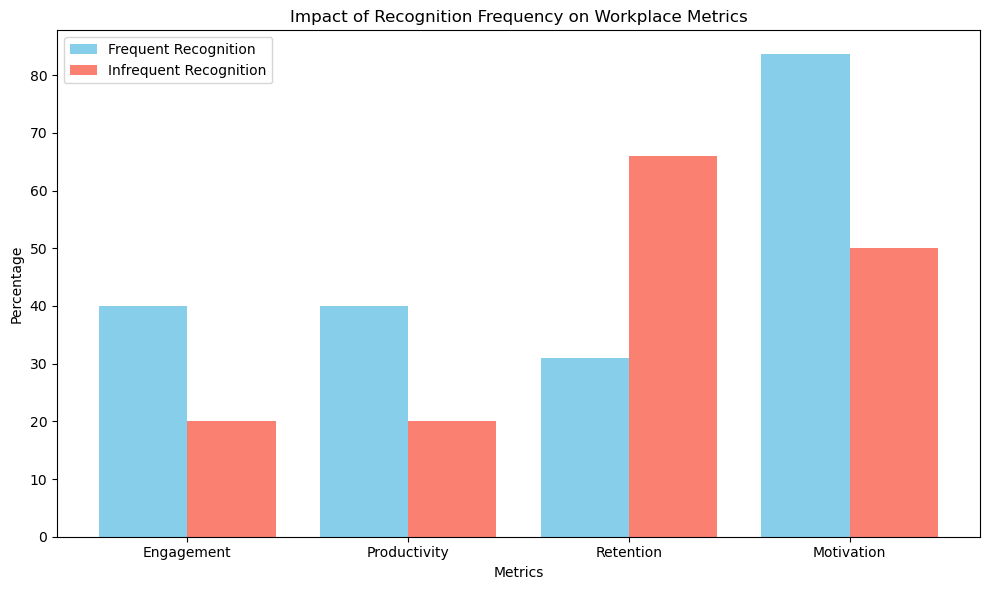

In [9]:
x = np.arange(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, frequent_recognition, width=0.4, label='Frequent Recognition', color='skyblue')
plt.bar(x + 0.2, infrequent_recognition, width=0.4, label='Infrequent Recognition', color='salmon')

plt.xticks(x, categories)
plt.xlabel("Metrics")
plt.ylabel("Percentage")
plt.title("Impact of Recognition Frequency on Workplace Metrics")
plt.legend()
plt.tight_layout()
plt.show()

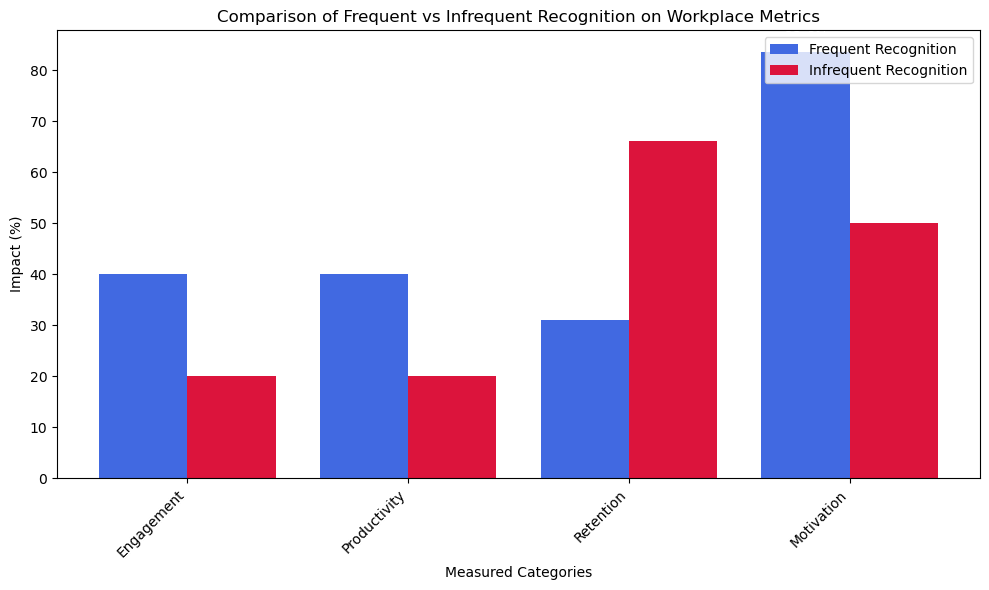

In [13]:
# Update the colors to deeper blue for frequent and deeper red for infrequent recognition

# Plot the updated grouped bar chart with revised colors
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, frequent_recognition, width=0.4, label='Frequent Recognition', color='royalblue')
plt.bar(x + 0.2, infrequent_recognition, width=0.4, label='Infrequent Recognition', color='crimson')

# Adding data labels above bars
for i in range(len(categories)):
    plt.text(x[i] - 0.2, frequent_recognition[i] + 2, f"{frequent_recognition[i]}%", ha='center', color='white', fontsize=10)
    plt.text(x[i] + 0.2, infrequent_recognition[i] + 2, f"{infrequent_recognition[i]}%", ha='center', color='white', fontsize=10)

# Adding labels, title, and legend
plt.xticks(x, categories, rotation=45, ha="right")
plt.xlabel("Measured Categories")
plt.ylabel("Impact (%)")
plt.title("Comparison of Frequent vs Infrequent Recognition on Workplace Metrics")
plt.legend(loc="upper right")

# Save and display the chart with updated colors
plt.tight_layout()
plt.show()



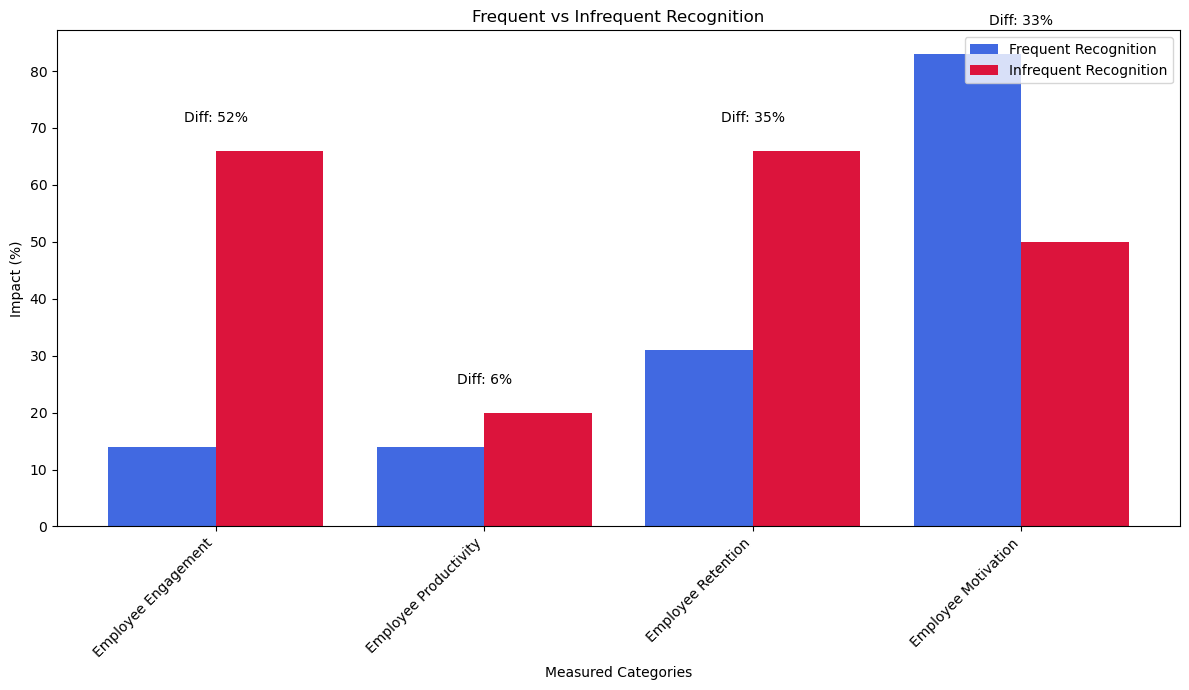

In [16]:
# Data for visualization
categories = [
    'Employee Engagement',
    'Employee Productivity',
    'Employee Retention',
    'Employee Motivation'
]
frequent_recognition = [14, 14, 31, 83]  # Percentages for frequent recognition
infrequent_recognition = [66, 20, 66, 50]  # Percentages for infrequent recognition
differences = [abs(frequent_recognition[i] - infrequent_recognition[i]) for i in range(len(categories))]

# Bar positions
x = np.arange(len(categories))

# Plot grouped bar chart
plt.figure(figsize=(12, 7))
plt.bar(x - 0.2, frequent_recognition, width=0.4, label='Frequent Recognition', color='royalblue')
plt.bar(x + 0.2, infrequent_recognition, width=0.4, label='Infrequent Recognition', color='crimson')

# Adding data labels and difference annotations
for i in range(len(categories)):
    plt.text(x[i] - 0.2, frequent_recognition[i] + 2, f"{frequent_recognition[i]}%", ha='center', color='white', fontsize=9)
    plt.text(x[i] + 0.2, infrequent_recognition[i] + 2, f"{infrequent_recognition[i]}%", ha='center', color='white', fontsize=9)
    plt.text(x[i], max(frequent_recognition[i], infrequent_recognition[i]) + 5, f"Diff: {differences[i]}%", ha='center', color='black', fontsize=10)

# Adding labels, title, and legend
plt.xticks(x, categories, rotation=45, ha="right")
plt.xlabel("Measured Categories")
plt.ylabel("Impact (%)")
plt.title("Frequent vs Infrequent Recognition")
plt.legend(loc="upper right")
plt.tight_layout()

# Save or show the plot
plt.savefig("chart_with_difference_annotations.png", dpi=350)  # Save the chart
plt.show()  # Display the chart


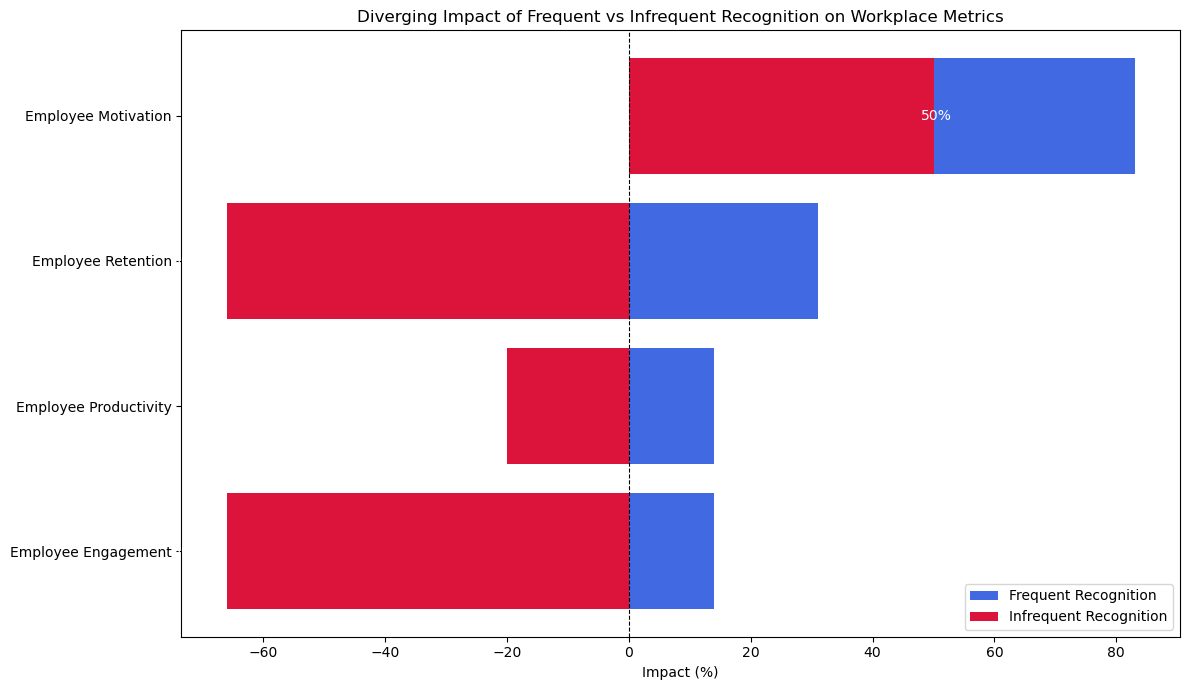

In [23]:
# Data setup for diverging bar chart
categories = [
    'Employee Engagement',
    'Employee Productivity',
    'Employee Retention',
    'Employee Motivation'
]
frequent_recognition = [14, 14, 31, 83]  # Positive impacts of frequent recognition
infrequent_recognition = [-66, -20, -66, 50]  # Negative impacts of infrequent recognition (disengagement)

# Prepare bar positions
x = np.arange(len(categories))

# Plot diverging bar chart
plt.figure(figsize=(12, 7))
plt.barh(x, frequent_recognition, color='royalblue', label='Frequent Recognition')
plt.barh(x, infrequent_recognition, color='crimson', label='Infrequent Recognition')

# Add labels
for i in range(len(categories)):
    plt.text(frequent_recognition[i] + (2 if frequent_recognition[i] > 0 else -4),
             x[i], f"{frequent_recognition[i]}%", va='center', ha='left' if frequent_recognition[i] > 0 else 'right',
             color='white', fontsize=10)
    plt.text(infrequent_recognition[i] - (4 if infrequent_recognition[i] < 0 else 2),
             x[i], f"{abs(infrequent_recognition[i])}%", va='center', ha='right' if infrequent_recognition[i] < 0 else 'left',
             color='white', fontsize=10)

# Formatting the chart
plt.yticks(x, categories)
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel("Impact (%)")
plt.title("Diverging Impact of Frequent vs Infrequent Recognition on Workplace Metrics")
plt.legend(loc="lower right")
plt.tight_layout()

# Save and display the chart
diverging_chart_path = "CWproj/Img"
plt.show()



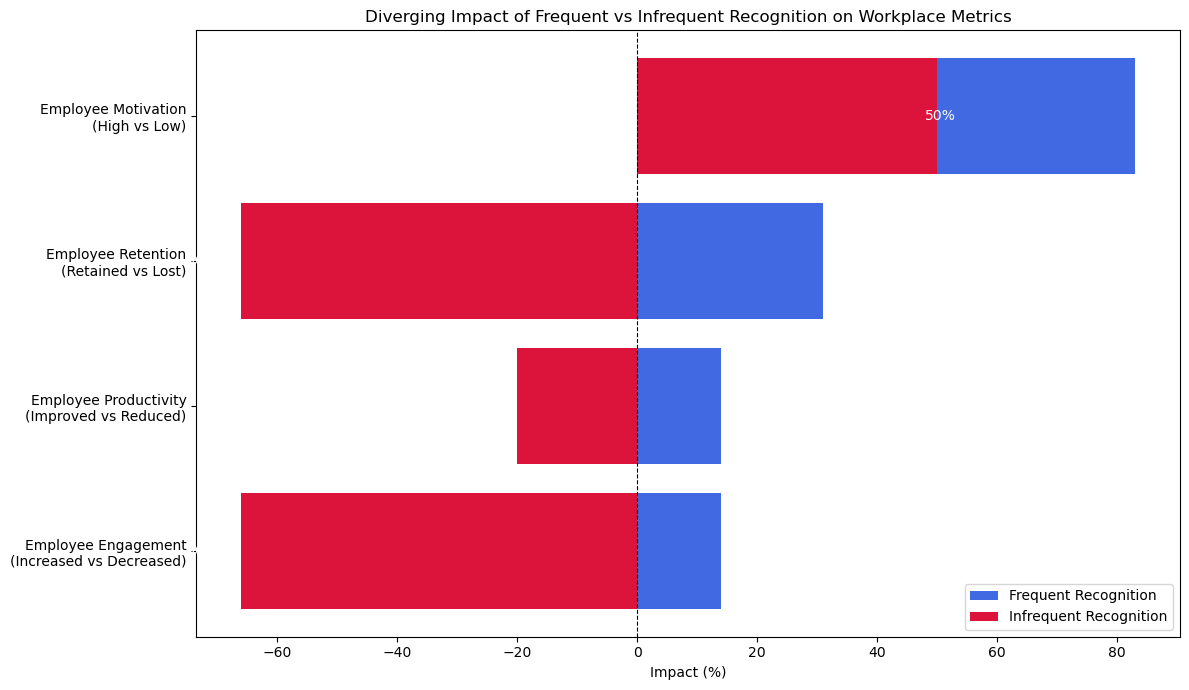

In [29]:
# Plot diverging bar chart with enhanced Y-axis labels
plt.figure(figsize=(12, 7))
plt.barh(x, frequent_recognition, color='royalblue', label='Frequent Recognition')
plt.barh(x, infrequent_recognition, color='crimson', label='Infrequent Recognition')

# Add only data labels
for i in range(len(categories)):
    # Frequent recognition labels
    plt.text(frequent_recognition[i] + (2 if frequent_recognition[i] > 0 else -4),
             x[i], f"{frequent_recognition[i]}%", va='center', ha='left' if frequent_recognition[i] > 0 else 'right',
             color='white', fontsize=10)
    
    # Infrequent recognition labels
    plt.text(infrequent_recognition[i] - (4 if infrequent_recognition[i] < 0 else 2),
             x[i], f"{abs(infrequent_recognition[i])}%", va='center', ha='right' if infrequent_recognition[i] < 0 else 'left',
             color='white', fontsize=10)

# Formatting the chart with enhanced axis labels
plt.yticks(x, [
    "Employee Engagement\n(Increased vs Decreased)",
    "Employee Productivity\n(Improved vs Reduced)",
    "Employee Retention\n(Retained vs Lost)",
    "Employee Motivation\n(High vs Low)"
])
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel("Impact (%)")
plt.title("Diverging Impact of Frequent vs Infrequent Recognition on Workplace Metrics")
plt.legend(loc="lower right")
plt.tight_layout()

# Corrected file path with file extension
diverging_chart_path = "Img.png"

# Save and display the chart
plt.savefig(diverging_chart_path, dpi=300)
plt.show()
